In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn-deep')


# Import Data and Clean

In [43]:
df_results = pd.read_csv('../data/results.csv')

In [33]:
df_results.head(40)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [49]:
# Mask pit starts, return new table
mask_0 = df_results['grid'] == 0
df_results = df_results[~mask_0]
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23100 entries, 0 to 24679
Data columns (total 18 columns):
resultId           23100 non-null int64
raceId             23100 non-null int64
driverId           23100 non-null int64
constructorId      23100 non-null int64
number             23100 non-null object
grid               23100 non-null int64
position           23100 non-null object
positionText       23100 non-null object
positionOrder      23100 non-null int64
points             23100 non-null float64
laps               23100 non-null int64
time               23100 non-null object
milliseconds       23100 non-null object
fastestLap         23100 non-null object
rank               23100 non-null object
fastestLapTime     23100 non-null object
fastestLapSpeed    23100 non-null object
statusId           23100 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usage: 3.3+ MB


## Separate pole position starts

In [6]:
# Mask for pole position only

mask_1 = df_results['grid'] == 1
df_top_grid = df_results[mask_1]
df_top_grid.head()
# H0: Having the pole position does not increase your probability of winning the race or a podium finish
# Ha: Having the pole position does increase your probability of winning the race or a podium finish

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
40,41,19,13,6,2,1,\N,R,19,0.0,30,\N,\N,15,5,1:35.914,208.048,20
46,47,20,9,2,4,1,3,3,3,6.0,57,+4.998,5471968,55,5,1:33.775,207.765,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
88,89,22,13,6,2,1,1,1,1,10.0,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1


In [7]:
finish_count = df_top_grid['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
finish_count = finish_count.sort_index(0)

In [8]:
finish_count.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31],
           dtype='int64')

## Plot scatter of pole position start finishes

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10eee4dd8>)

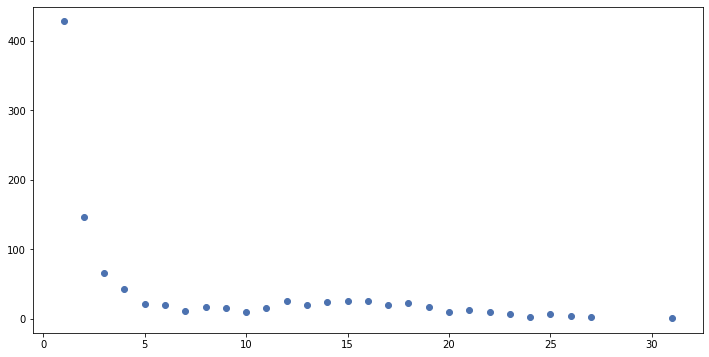

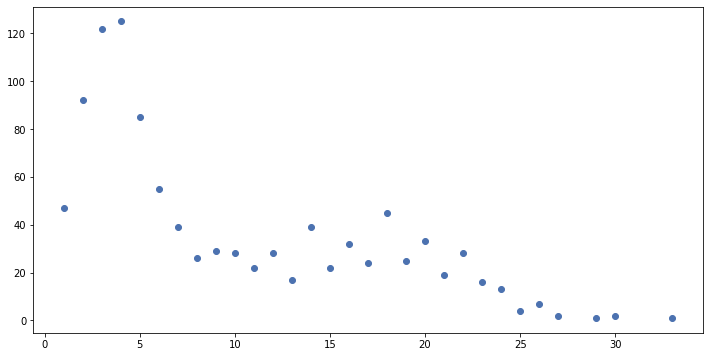

In [9]:
def plot_finishes_by_start(n):
    masker = df_results['grid'] == n
    masked_grid = df_results[masker]
    gridcount = masked_grid['positionOrder'].value_counts()
    gridcount = gridcount.sort_index(0)
    fig, ax = plt.subplots(figsize = (12,6))
    ax.scatter(gridcount.index, gridcount)
    return fig, ax

plot_finishes_by_start(1)
plot_finishes_by_start(5)

# ax.scatter(finish_count.index, finish_count)

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a28bda160>)

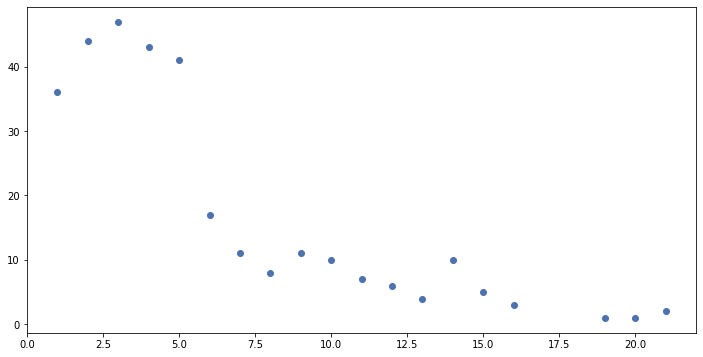

In [89]:
def plot_finishes(n, df, col):
    if col == 'rank':
        masker = df[col] == str(n)
    else:
        masker = df[col] == n
    masked_grid = df_results[masker]
    count = masked_grid['positionOrder'].value_counts()
    count = count.sort_index(0)
    fig, ax = plt.subplots(figsize = (12,6))
    ax.scatter(count.index, count)
    return fig, ax

plot_finishes(4, df_results, 'rank')


In [45]:
df_not_top = df_results[~mask_1]
df_not_top.head()

/Users/Charles/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [11]:
not_pole_finish_count = df_not_top['positionOrder'].value_counts()
# This shows a very high likelihood that having a pole position would increase your chance of a podium finish or win
not_pole_finish_count = not_pole_finish_count.sort_index(0)
not_pole_finish_count

1      596
2      883
3      965
4      988
5     1006
6     1009
7     1017
8     1011
9     1012
10    1012
11    1013
12    1000
13    1000
14     992
15     987
16     971
17     953
18     934
19     921
20     903
21     684
22     650
23     452
24     432
25     288
26     237
27      39
28      26
29      22
30      21
31      17
32      14
33      12
34       1
Name: positionOrder, dtype: int64

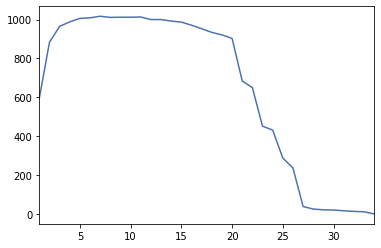

In [12]:
fig, ax = plt.subplots()
not_pole_finish_count.plot()

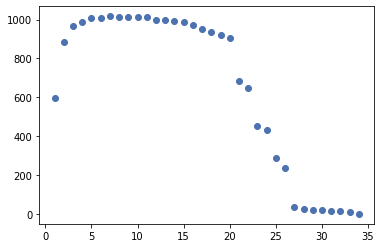

In [13]:
fig, ax = plt.subplots()
ax.scatter(not_pole_finish_count.index, not_pole_finish_count)

In [14]:
def cdf(value, array):
    return (array<value).sum()/len(array)

vcdf = np.vectorize(cdf, excluded = ['array'])



In [17]:
cdf1 = vcdf(value = finish_count.index, array = finish_count)
# cdf2 = vcdf(value = grid_2.index, array = grid_2)
# cdf3 = vcdf(value = grid_3.index, array = grid_3)

# x axis needs to be finish position, instead of finish count

In [ ]:
plt.figsize(16,8)
plt.scatter(finish_count.index, cdf1)

# plt.scatter(grid_2.index, cdf2)
# plt.scatter(grid_3.index, cdf3)

In [ ]:

#starting positon vs fininishing
#drop pit starts

In [ ]:
finish_count[:20], not_pole_finish_count[:20]

In [ ]:
# calculate spearman's correlation
stats.spearmanr(df_results['grid'], df_results['positionOrder'])
#positive correlation, low p-value

p = 0.0105
Meaning it is statistically significant and the null hypothesis can be rejected.

In [ ]:
plt.violinplot(df_top_grid['positionOrder'])


In [ ]:
plt.figure(figsize=(20,10))
# plt.scatter(df_results['positionOrder'], df_results['grid'])
# plt.boxplot([df_not_top['positionOrder']], [df_not_top['grid']])
sns.set(style="ticks")


x = df_results['positionOrder']
y = df_results['grid']

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [ ]:
fig, ax = plt.subplots()
finish_count.plot()
not_pole_finish_count.plot()
# Need to analyze how each grid position fares

In [ ]:
mask_2 = df_results['grid'] == 2
mask_3 = df_results['grid'] == 3
mask_4 = df_results['grid'] == 4
mask_5 = df_results['grid'] == 5
mask_6 = df_results['grid'] == 6
mask_7 = df_results['grid'] == 7
mask_8 = df_results['grid'] == 8
mask_9 = df_results['grid'] == 9
mask_10 = df_results['grid'] == 10


In [ ]:
grid_2 = df_not_top[mask_2]
grid_2 = grid_2['positionOrder'].value_counts().sort_index()
grid_3 = df_not_top[mask_3]
grid_3 = grid_3['positionOrder'].value_counts().sort_index()
grid_4 = df_not_top[mask_4]
grid_4 = grid_4['positionOrder'].value_counts().sort_index()
grid_5 = df_not_top[mask_5]
grid_5 = grid_5['positionOrder'].value_counts().sort_index()
grid_6 = df_not_top[mask_6]
grid_6 = grid_6['positionOrder'].value_counts().sort_index()
grid_7 = df_not_top[mask_7]
grid_7 = grid_7['positionOrder'].value_counts().sort_index()
grid_8 = df_not_top[mask_8]
grid_8 = grid_8['positionOrder'].value_counts().sort_index()
grid_9 = df_not_top[mask_9]
grid_9 = grid_9['positionOrder'].value_counts().sort_index()
grid_10 = df_not_top[mask_10]
grid_10 = grid_10['positionOrder'].value_counts().sort_index()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

finish_count.plot(label= '1')
grid_2.plot(label= '2')
grid_3.plot(label= '3')
grid_4.plot(label= '4')
grid_5.plot(label= '5')
grid_6.plot(label= '6')
grid_7.plot(label= '7')
grid_8.plot(label= '8')
grid_9.plot(label= '9')
grid_10.plot(label= '10');
plt.title('Amount of Race Finishes by Starting Position')
plt.xlabel('Finish Position')
plt.ylabel('Amount')
ax.legend()

#waterfall
#pearson
#spearman ** 
#p-value 
#take out a random sample of race results, do spearman correlation test, return p-value, 
#then take spearman of entire population, take a sample of a small size, bigger size
#investigation of the test
#confidence interval for sample correlation



In [ ]:
plt.figure(figsize=(25,8))
sns.violinplot(x="grid", y="positionOrder", data=df_results);
plt.savefig('../images/vioplot.png')

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x="grid", y="positionOrder", data=df_results);


# Check correlation for Fastest Lap ('rank')

In [ ]:

df_rank = df_results


In [63]:
# Rank is actually written as a string
rank_1 = df_results['rank'] == str(1)
df_rank_1 = df_results[mask_rank]
df_rank_1

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
27,28,19,2,2,3,5,6,6,6,3.0,56,+49.833,5528388,55,1,1:35.366,209.244,1
48,49,20,5,1,23,5,5,5,5,4.0,57,+26.789,5493759,49,1,1:33.193,209.062,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
90,91,22,8,6,1,4,3,3,3,6.0,58,+4.271,5213722,20,1,1:26.506,222.144,1
116,117,23,8,6,1,2,9,9,9,0.0,76,+33.792,7276534,74,1,1:16.689,156.789,1
145,146,24,8,6,1,3,\N,R,18,0.0,19,\N,\N,14,1,1:17.387,202.871,4
149,150,25,8,6,1,1,2,2,2,8.0,70,+17.984,5528229,16,1,1:16.630,207.224,1
171,172,26,8,6,1,3,4,4,4,5.0,59,\N,\N,18,1,1:32.150,200.842,11
191,192,27,2,2,3,12,4,4,4,5.0,67,+9.825,5490699,52,1,1:15.987,216.700,1


In [94]:
maskr_1 = df_results['rank'] == str(1)
maskr_2 = df_results['rank'] == str(2)
maskr_3 = df_results['rank'] == str(3)
maskr_4 = df_results['rank'] == str(4)
maskr_5 = df_results['rank'] == str(5)
maskr_6 = df_results['rank'] == str(6)
maskr_7 = df_results['rank'] == str(7)
maskr_8 = df_results['rank'] == str(8)
maskr_9 = df_results['rank'] == str(9)
maskr_10 = df_results['rank'] == str(10)


In [95]:
rank_1 = df_results[maskr_1]
rank_1 = rank_1['positionOrder'].value_counts().sort_index()
rank_2 = df_results[maskr_2]
rank_2 = rank_2['positionOrder'].value_counts().sort_index()
rank_3 = df_results[maskr_3]
rank_3 = rank_3['positionOrder'].value_counts().sort_index()
rank_4 = df_results[maskr_4]
rank_4 = rank_4['positionOrder'].value_counts().sort_index()
rank_5 = df_results[maskr_5]
rank_5 = rank_5['positionOrder'].value_counts().sort_index()
rank_6 = df_results[maskr_6]
rank_6 = rank_6['positionOrder'].value_counts().sort_index()
rank_7 = df_results[maskr_7]
rank_7 = rank_7['positionOrder'].value_counts().sort_index()
rank_8 = df_results[maskr_8]
rank_8 = rank_8['positionOrder'].value_counts().sort_index()
rank_9 = df_results[maskr_9]
rank_9 = rank_9['positionOrder'].value_counts().sort_index()
rank_10 = df_results[maskr_10]
rank_10 = rank_10['positionOrder'].value_counts().sort_index()

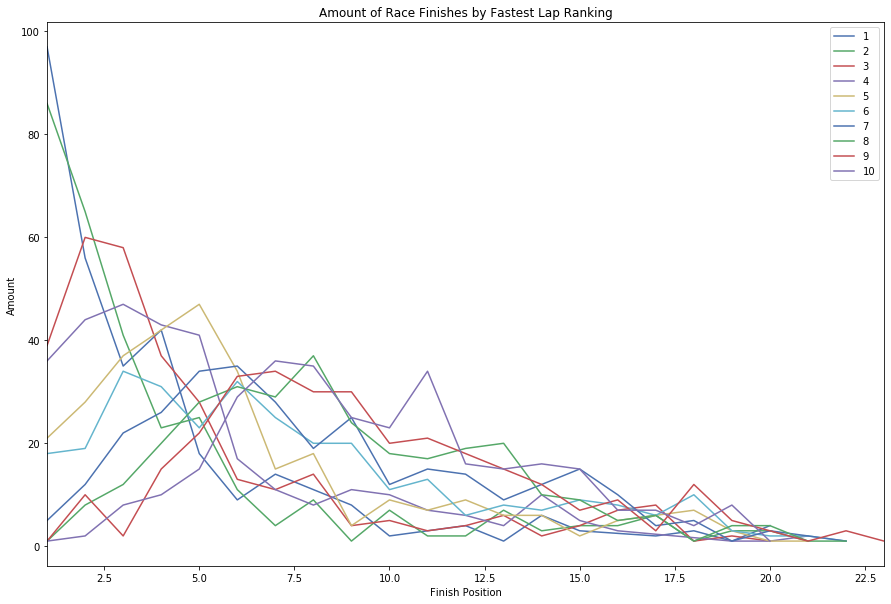

In [99]:
fig, ax = plt.subplots(figsize=(15,10))
rank_1.plot(label= '1')
rank_2.plot(label= '2')
rank_3.plot(label= '3')
rank_4.plot(label= '4')
rank_5.plot(label= '5')
rank_6.plot(label= '6')
rank_7.plot(label= '7')
rank_8.plot(label= '8')
rank_9.plot(label= '9')
rank_10.plot(label= '10');
plt.title('Amount of Race Finishes by Fastest Lap Ranking')
plt.xlabel('Finish Position')
plt.ylabel('Amount')
ax.legend();

## Spearman test for correlation between fastest time

In [100]:
stats.spearmanr(df_results['rank'], df_results['positionOrder'])
# low correlation but also microscopic p value

/Users/Charles/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.061818957065523365, pvalue=5.245026456533055e-21)

## Extra analysis

### Winners only

In [102]:
wins_only = df_results['positionOrder'] == 1
wins_df = df_results[wins_only]


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
22,23,19,8,6,1,2,1,1,1,10.0,56,1:31:18.555,5478555,37,2,1:35.405,209.158,1
44,45,20,13,6,2,2,1,1,1,10.0,57,1:31:06.970,5466970,38,3,1:33.600,208.153,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
88,89,22,13,6,2,1,1,1,1,10.0,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1
108,109,23,1,1,22,3,1,1,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152,1
128,129,24,9,2,4,2,1,1,1,10.0,70,1:36:24.227,5784227,47,4,1:17.539,202.473,1
148,149,25,13,6,2,2,1,1,1,10.0,70,1:31:50.245,5510245,20,2,1:16.729,206.956,1
168,169,26,1,1,22,4,1,1,1,10.0,60,1:39:09.440,5949440,16,3,1:32.817,199.398,1
188,189,27,1,1,22,1,1,1,1,10.0,67,1:31:20.874,5480874,17,2,1:16.039,216.552,1


In [115]:
wins_df['driverId']


0          1
22         8
44        13
66         8
88        13
108        1
128        9
148       13
168        1
188        1
208        5
228       13
248       13
268       20
288        4
308        4
328        1
348       13
368        8
390        4
412       13
434       13
456        4
478        1
500        1
522        8
544        8
566        4
588        1
610       13
        ... 
24077      1
24097      1
24117      8
24137    830
24157      1
24177      1
24197    822
24217      1
24237      1
24257    822
24277      1
24300      1
24320      1
24340      1
24360    830
24380      1
24400    830
24420      1
24440    844
24460    844
24480     20
24500      1
24520    822
24540      1
24560    822
24561    822
24581    830
24601      1
24640      1
24660      1
Name: driverId, Length: 1024, dtype: int64

AttributeError: 'Series' object has no attribute 'value_count'

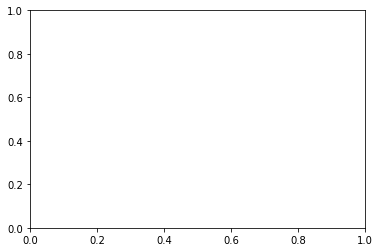

In [110]:
fig, ax = plt.subplots()
ax.bar(wins_df['driverId'], )